In [69]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn import linear_model
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('C:\\Users\\Naveen Kumar\\OneDrive - RxLogix\\Documents\\PersoMe\\MLcodes\\Titanic ML\\train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df['Age'].isna().sum()

177

In [5]:
df_use = df.drop(columns = ['Name','Ticket','Cabin'])

In [55]:
df_use.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [37]:
df_grp = df_use[['Survived','Sex']].groupby('Sex').sum()

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

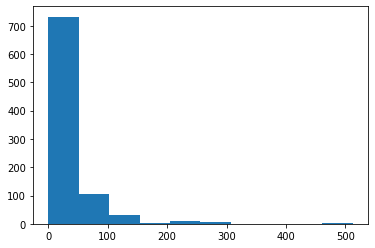

In [68]:
plt.hist(df_use.Fare)

In [42]:
print(df_grp)

      Sex  Survived
0  female       233
1    male       109


In [41]:
df_grp.reset_index(inplace = True)

Text(0.5, 1.0, 'Suvived vs Sex')

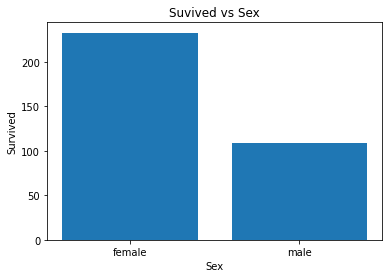

In [44]:
plt.bar(df_grp.Sex, df_grp.Survived)
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.title('Suvived vs Sex')

In [47]:
df_grp2 = df_use[['Survived','Age']].groupby('Survived').mean()

In [48]:
df_grp2

,Age
Survived,
0,30.626179
1,28.343690


(array([ 18.,  16.,  99., 110.,  64.,  45.,  38.,  15.,  13.,   6.]),
 array([ 1. ,  8.3, 15.6, 22.9, 30.2, 37.5, 44.8, 52.1, 59.4, 66.7, 74. ]),
 <BarContainer object of 10 artists>)

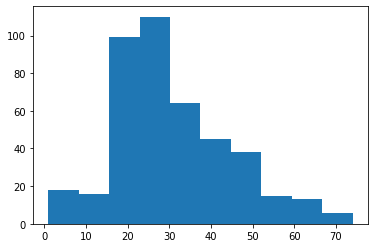

In [51]:
plt.hist(df_use[df_use['Survived'] == 0].Age)

(array([36., 19., 63., 65., 52., 24., 21.,  9.,  0.,  1.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

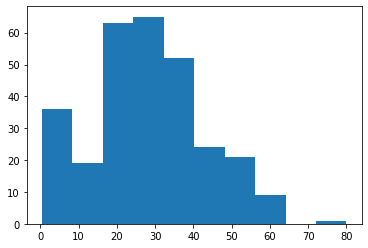

In [53]:
plt.hist(df_use[df_use['Survived'] == 1].Age)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

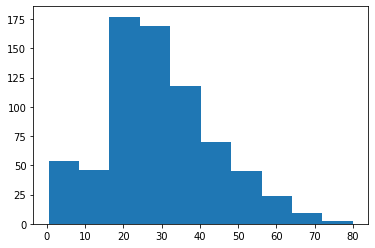

In [19]:
plt.hist(df_use.Age)

In [64]:
df_grp3 = df_use[['Survived','Pclass']].groupby('Pclass').sum()

In [66]:
df_grp3.reset_index(inplace = True)

<BarContainer object of 3 artists>

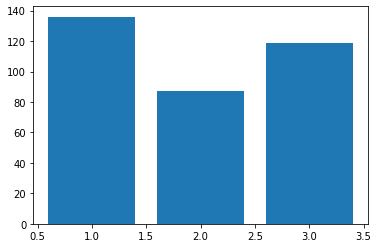

In [67]:
plt.bar(df_grp3.Pclass, df_grp3.Survived)

In [8]:
df_use.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [15]:
df_use.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
x = ['Male', 'Female']
y = [577, 314]

<BarContainer object of 2 artists>

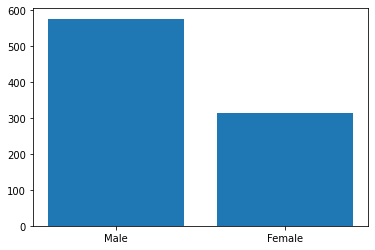

In [18]:
plt.bar(x,y)

In [14]:
df_use.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<BarContainer object of 2 artists>

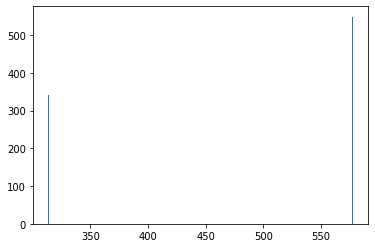

In [20]:
plt.bar(df_use.Sex.value_counts(),df_use.Survived.value_counts())

In [7]:
df_use.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [92]:
df_use.Sex.unique()

array(['male', 'female'], dtype=object)

In [93]:
df_use['Sex'] = [1 if x == 'female' else 0 for x in df_use['Sex']]

In [94]:
df_use.Sex.unique()

array([0, 1], dtype=int64)

In [25]:
df_use.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


In [95]:
df_use.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [96]:
df_use.groupby('Embarked').count()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Embarked,,,,,,,,
C,168,168,168,168,130,168,168,168
Q,77,77,77,77,28,77,77,77
S,644,644,644,644,554,644,644,644


In [97]:
df_use['Embarked'].isna().sum()

2

In [98]:
dummies = pd.get_dummies(df_use.Embarked, dummy_na = False)

In [99]:
dummies.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [38]:
dummies.shape

(891, 4)

In [100]:
df_use_new = pd.concat([df_use, dummies], axis = 1)

In [40]:
df_use_new.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,NaN
0,1,0,3,0,22.0,1,0,7.2500,S,0,0,1,0
1,2,1,1,1,38.0,1,0,71.2833,C,1,0,0,0
2,3,1,3,1,26.0,0,0,7.9250,S,0,0,1,0
3,4,1,1,1,35.0,1,0,53.1000,S,0,0,1,0
4,5,0,3,0,35.0,0,0,8.0500,S,0,0,1,0


In [101]:
df_use_new.drop(columns = ['Embarked'], inplace = True)

In [102]:
df_use_new.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1,0,3,0,22.0,1,0,7.2500,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1


In [103]:
df_use_new.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
C                uint8
Q                uint8
S                uint8
dtype: object

In [75]:
#df_use_new.rename(columns = {'NaN' : 'NaN'}, inplace = True)

In [104]:
df_use_new['Age'].fillna(df_use_new['Age'].median(), inplace = True)

In [68]:
df_use_new.columns.

dtype('O')

In [105]:
df_use_new.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
C              0
Q              0
S              0
dtype: int64

In [106]:
lim = int(len(df_use_new)*0.8)

In [107]:
x_train, y_train = df_use_new.iloc[:lim,:].drop('Survived', axis = 1), df_use_new.iloc[:lim,1]
x_val, y_val = df_use_new.iloc[lim:,:].drop('Survived', axis = 1), df_use_new.iloc[lim:,1]

In [108]:
x_train.shape

(712, 10)

In [109]:
y_train.shape

(712,)

In [110]:
x_val.shape

(179, 10)

In [55]:
y_val.shape

(179,)

In [ ]:
# The above is Exploratory Data Analysis and below now I have done tha same thing via functions

In [239]:
def data_clean():
    df = pd.read_csv('C:\\Users\\Naveen Kumar\\OneDrive - RxLogix\\Documents\\PersoMe\\MLcodes\\Titanic ML\\train.csv')
    df_use = df.drop(columns = ['Name','Ticket','Cabin','PassengerId'])
    df_use['Sex'] = [1 if x == 'female' else 0 for x in df_use['Sex']]
    dummies = pd.get_dummies(df_use.Embarked, dummy_na = False)
    df_use_new = pd.concat([df_use, dummies], axis = 1)
    #df_use_new = df_use
    df_use_new.drop(columns = ['Embarked','Fare'], inplace = True)
    df_use_new['Age'].fillna(df_use_new['Age'].mean(), inplace = True)
    #df_use_new = shuffle(df_use_new)
    #df_use_new.reset_index(drop = True, inplace =True)
    return df_use_new


df_use_new = data_clean()

#lim = int(len(df_use_new)*0.85)
#x_train, y_train = df_use_new.iloc[:lim,:].drop('Survived', axis = 1), df_use_new.iloc[:lim,1]
#x_val, y_val = df_use_new.iloc[lim:,:].drop('Survived', axis = 1), df_use_new.iloc[lim:,1]
    

In [240]:
x_train, y_train = df_use_new.drop('Survived', axis = 1), df_use_new['Survived']

In [241]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,C,Q,S
0,3,0,22.0,1,0,0,0,1
1,1,1,38.0,1,0,1,0,0
2,3,1,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,3,0,35.0,0,0,0,0,1


In [164]:
x_train.dtypes

Pclass      int64
Sex         int64
Age       float64
SibSp       int64
Parch       int64
C           uint8
Q           uint8
S           uint8
dtype: object

In [149]:
df_use_new.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,632,0,3,0,51.0,7.0542
1,359,1,3,1,28.0,7.8792
2,769,0,3,0,28.0,24.1500
3,623,1,3,0,20.0,15.7417
4,319,1,1,1,31.0,164.8667


In [150]:
df_use_new.shape

(891, 6)

In [151]:
df_use_new['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<BarContainer object of 2 artists>

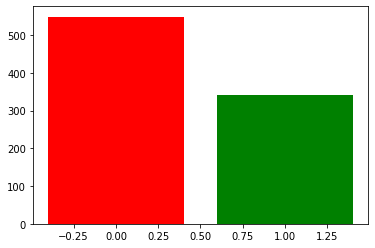

In [152]:
plt.bar(df_use_new['Survived'].value_counts().keys(),df_use_new['Survived'].value_counts(), color = ['r','g'])
# red - died, green - survived

<BarContainer object of 3 artists>

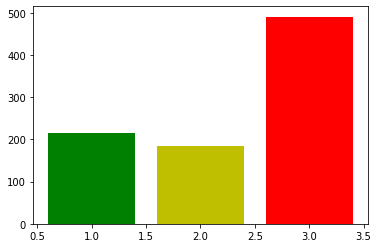

In [154]:
plt.bar(df_use_new['Pclass'].value_counts().keys(),df_use_new['Pclass'].value_counts(), color = ['r','g','y'])

<BarContainer object of 2 artists>

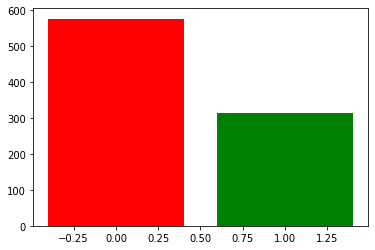

In [155]:
plt.bar(df_use_new['Sex'].value_counts().keys(),df_use_new['Sex'].value_counts(), color = ['r','g'])

In [158]:
def create_age_cat(x):
    if x <= 10:
        return 0
    elif x > 11 and x< 40:
        return 1
    else:
        return 2
            
    

df_use_new['Age cat'] = df_use_new['Age'].apply(create_age_cat)
            

In [160]:
df_use_new['Age cat'].value_counts()

1    660
2    167
0     64
Name: Age cat, dtype: int64

<BarContainer object of 3 artists>

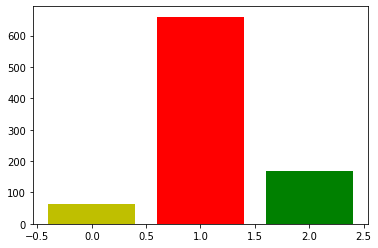

In [159]:
plt.bar(df_use_new['Age cat'].value_counts().keys(),df_use_new['Age cat'].value_counts(), color = ['r','g','y'])

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

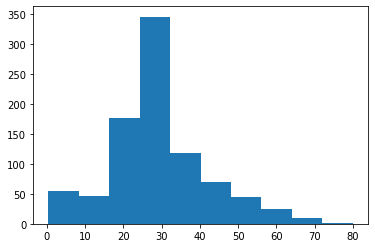

In [161]:
plt.hist(df_use_new['Age'])

In [147]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
print('Coefficients: ', reg.coef_)
print('Variance score: {}'.format(reg.score(x_val, y_val)))

Coefficients:  [ 6.75935681e-06 -1.86414395e-01  4.82743435e-01 -5.31572511e-03
  9.33024820e-05]
Variance score: 0.4343959636137743


In [242]:
m = RandomForestClassifier(n_estimators = 150, max_features = 4 , max_depth = 5, 
                           max_samples = 590, oob_score = True, random_state = 2) #min_samples_leaf = 2

%time m.fit(x_train, y_train)
print('Training set score :',m.score(x_train, y_train))
#print('Validation set score :',m.score(x_val, y_val))
print('OOB Score :', m.oob_score_)


Wall time: 232 ms
Training set score : 0.8417508417508418
OOB Score : 0.8249158249158249


In [235]:
def data_clean_test():
    df = pd.read_csv('C:\\Users\\Naveen Kumar\\OneDrive - RxLogix\\Documents\\PersoMe\\MLcodes\\Titanic ML\\test.csv')
    df_use = df.drop(columns = ['Name','Ticket','Cabin','PassengerId'])
    df_use['Sex'] = [1 if x == 'female' else 0 for x in df_use['Sex']]
    dummies = pd.get_dummies(df_use.Embarked, dummy_na = False)
    df_use_new_test = pd.concat([df_use, dummies], axis = 1)
    #df_use_new_test = df_use
    df_use_new_test.drop(columns = ['Embarked','Fare'], inplace = True)
    df_use_new_test['Age'].fillna(df_use_new['Age'].mean(), inplace = True)
    #df_use_new_test['Fare'].fillna(df_use_new['Fare'].mean(), inplace = True)
    #df_use_new = shuffle(df_use_new)
    return df_use_new_test


df_use_new_test = data_clean_test()

In [236]:
df_test = pd.read_csv('C:\\Users\\Naveen Kumar\\OneDrive - RxLogix\\Documents\\PersoMe\\MLcodes\\Titanic ML\\test.csv')

In [237]:
predictions = m.predict(df_use_new_test)
Survived = pd.Series(predictions)
Survived.name = 'Survived'
final_pred = pd.concat([df_test['PassengerId'],Survived], axis = 1)
print(final_pred.shape)

(418, 2)


In [238]:
final_pred.to_csv('C:\\Users\\Naveen Kumar\\OneDrive - RxLogix\\Documents\\PersoMe\\MLcodes\\Titanic ML\\Submission7.csv',
                  index = False)

In [208]:
rfc = RandomForestClassifier()

params = {'n_estimators' : list(range(50,110,5)), 'max_features' : ['auto','sqrt','log2'], 'max_depth' : list(range(10,80,2))}

clf = GridSearchCV(rfc, params, scoring = 'accuracy', cv = 10)

%time clf.fit(x_train, y_train)

print('Best Params :', clf.best_params_)
print('Best score :', clf.best_score_)

Wall time: 24min 4s
Best Params : {'max_depth': 72, 'max_features': 'auto', 'n_estimators': 55}
Best score : 0.8245696400625977


In [123]:
df_use_new.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare
643,644,1,3,0,28.0,56.4958
212,213,0,3,0,22.0,7.2500
98,99,1,2,1,34.0,23.0000
521,522,0,3,0,22.0,7.8958
252,253,0,1,0,62.0,26.5500


In [109]:
## finding correlation between vairables
from scipy.stats import pearsonr

In [122]:
corr1,_ = pearsonr(df_use_new.Survived, df_use_new.Sex)
print(corr1)

0.5433513806577555


In [113]:
corr2,_ = pearsonr(df_use_new.Survived, df_use_new.Age)
print(corr2)

-0.06491041993052586


In [128]:
corr3,_ = pearsonr(df_use_new.Age, df_use_new.Fare)
print(corr3)

0.09668842218036486


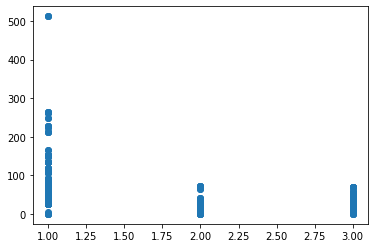

In [130]:
plt.scatter(df_use_new.Pclass, df_use_new.Fare)

In [121]:
print(df_use_new.groupby('Sex').sum())

     PassengerId  Survived  Pclass       Age        Fare
Sex                                                     
0         262043       109    1379  17391.17  14727.2865
1         135343       233     678   8770.00  13966.6628


In [125]:
import seaborn as sn
#sn.catplot(y = df_use_new.Survived, x = df_use_new.Age)

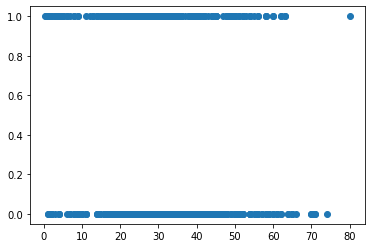

In [126]:
import matplotlib.pyplot as plt
plt.scatter(df_use_new.Age, df_use_new.Survived)

In [41]:
estimator = m.estimators_[5]


# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = None,
                class_names = None,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
#from subprocess import check_call
#check_call(['dot', '-Tpng', 'C:\\Users\\Naveen Kumar\\OneDrive - RxLogix\\Documents\\PersoMe\\MLcodes\\Bulldozers\\tree.dot',
#      '-o', 'C:\\Users\\Naveen Kumar\\OneDrive - RxLogix\\Documents\\PersoMe\\MLcodes\\Bulldozers\\tree.png', '-Gdpi=600'])

import pydot

(graph,) = pydot.graph_from_dot_file('C:\\tree.dot')
#graph.write('C:\\tree.png')

# Display in jupyter notebook
#from IPython.display import Image
#Image(filename = 'tree.png')

In [48]:
#graph.write('C:\\trees.png', format = 'pdf')

In [40]:
from IPython.display import Image
Image(filename = 'trees.png')

In [33]:
type(graph)

pydot.Dot

In [34]:
print(graph)

digraph Tree {
node [color="black", fontname="helvetica", shape=box, style="filled, rounded"];
edge [fontname="helvetica"];
0 [fillcolor="#f5ccaf", label="X[6] <= 10.87\ngini = 0.47\nsamples = 457\nvalue = [446, 266]"];
1 [fillcolor="#eca16c", label="X[2] <= 0.5\ngini = 0.32\nsamples = 186\nvalue = [234, 60]"];
0 -> 1  [headlabel="True", labelangle=45, labeldistance="2.5"];
2 [fillcolor="#e88f4f", label="X[3] <= 28.5\ngini = 0.18\nsamples = 143\nvalue = [200, 22]"];
1 -> 2;
3 [fillcolor="#e68742", label="X[0] <= 203.0\ngini = 0.08\nsamples = 93\nvalue = [137, 6]"];
2 -> 3;
4 [fillcolor="#e58139", label="gini = 0.0\nsamples = 22\nvalue = [37, 0]"];
3 -> 4;
5 [fillcolor="#e78945", label="gini = 0.11\nsamples = 71\nvalue = [100, 6]"];
3 -> 5;
6 [fillcolor="#eca16b", label="X[0] <= 286.5\ngini = 0.32\nsamples = 50\nvalue = [63, 16]"];
2 -> 6;
7 [fillcolor="#e58139", label="gini = 0.0\nsamples = 18\nvalue = [30, 0]"];
6 -> 7;
8 [fillcolor="#f2be99", label="gini = 0.44\nsamples = 32\nvalue =